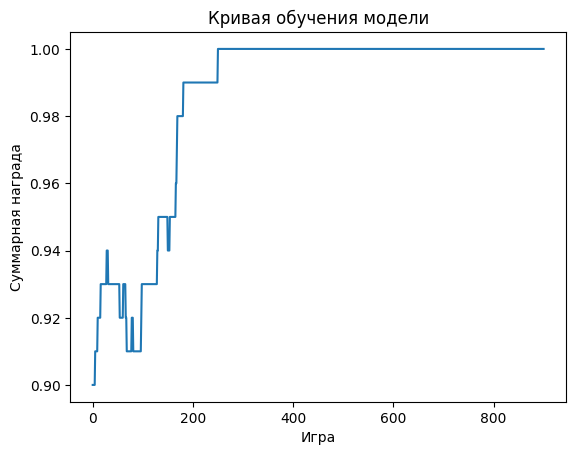

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class TicTacToe:
    def __init__(self, size):
        self.size = size  
        self.board = np.zeros((size, size), dtype=int) 
        self.done = False 
        self.winner = None  

    def reset(self):
        """Сбрасывает поле и параметры игры для новой игры."""
        self.board = np.zeros((self.size, self.size), dtype=int)
        self.done = False
        self.winner = None

    def step(self, x, y, player):
        """Выполняет ход игрока и проверяет, завершена ли игра."""
        if self.board[x, y] == 0: 
            self.board[x, y] = player
           
            if self.check_win(player):
                self.done = True
                self.winner = player
            
            elif not (self.board == 0).any():
                self.done = True
                self.winner = 0  
            return True
        return False  

    def check_win(self, player):
        """Проверяет, есть ли выигрышная комбинация для игрока."""
        
        if all(self.board[i, :] == player) or all(self.board[:, i] == player):
                return True
        
        if all(np.diag(self.board) == player) or all(np.diag(np.fliplr(self.board)) == player):
            return True
        return False

    def get_state(self):
        """Возвращает текущее состояние поля в виде кортежа для Q-таблицы."""
        return tuple(self.board.flatten())


alpha = 0.1       
gamma = 0.9       
epsilon = 1.0     
decay = 0.99      

q_table = {}  


def choose_action(state, size, epsilon):
    """Выбирает действие на основе Q-таблицы или случайным образом."""
    if random.uniform(0, 1) < epsilon:
        return (random.randint(0, size - 1), random.randint(0, size - 1))
    q_values = q_table.get(state, {})
    if not q_values:
        return (random.randint(0, size - 1), random.randint(0, size - 1))
    return max(q_values, key=q_values.get)

def update_q_value(state, action, reward, next_state):
    """Обновляет значение Q-таблицы на основе сделанного хода и полученного результата."""
    q_values = q_table.setdefault(state, {})
    old_q_value = q_values.get(action, 0)
    max_next_q_value = max(q_table.get(next_state, {}).values(), default=0)
    q_values[action] = old_q_value + alpha * (reward + gamma * max_next_q_value - old_q_value)

num_games = 1000 
rewards = []     
game_size = 3    
game = TicTacToe(game_size)

for i in range(num_games):
    game.reset()
    state = game.get_state()
    total_reward = 0
    player = 1 

    while not game.done:
        action = choose_action(state, game.size, epsilon)
        if game.step(action[0], action[1], player):
            next_state = game.get_state()
            if game.done:
                reward = 1 if game.winner == player else -1 if game.winner == -player else 0
            else:
                reward = 0
            update_q_value(state, action, reward, next_state)
            total_reward += reward
            state = next_state
            player = -player  

    rewards.append(total_reward)
    epsilon *= decay  

plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.xlabel('Игра')
plt.ylabel('Суммарная награда')
plt.title('Кривая обучения модели')
plt.show()

In [ ]:
def play_against_ai(game):
    """Позволяет игроку сыграть против обученной модели."""
    game.reset()
    state = game.get_state()
    player = 1  

    while not game.done:
        if player == 1:
            action = choose_action(state, game.size, 0)  
            print(f"ИИ делает ход: {action}")
        else:
            print(game.board)
            x, y = map(int, input("Введите координаты хода (x y): ").split())
            action = (x, y)

        if game.step(action[0], action[1], player):
            state = game.get_state()
            player = -player
        else:
            print("Недопустимый ход! Попробуйте снова.")

    print("Игра завершена!")
    print(game.board)
    if game.winner == 1:
        print("ИИ победил!")
    elif game.winner == -1:
        print("Вы победили!")
    else:
        print("Ничья.")

play_against_ai(game)

ИИ делает ход: (1, 0)
[[0 0 0]
 [1 0 0]
 [0 0 0]]
ИИ делает ход: (0, 2)
[[ 0  0  1]
 [ 1 -1  0]
 [ 0  0  0]]
Недопустимый ход! Попробуйте снова.
[[ 0  0  1]
 [ 1 -1  0]
 [ 0  0  0]]
Недопустимый ход! Попробуйте снова.
[[ 0  0  1]
 [ 1 -1  0]
 [ 0  0  0]]
ИИ делает ход: (1, 2)
[[ 0  0  1]
 [ 1 -1  1]
 [ 0 -1  0]]
Игра завершена!
[[ 0 -1  1]
 [ 1 -1  1]
 [ 0 -1  0]]
Вы победили!
